In [180]:
import pandas as pd
import numpy as np
import os
import csv
import bokeh as bk
from bokeh.plotting import figure,show,output_notebook,output_file
from bokeh.models import NumeralTickFormatter
from bokeh.palettes import D3
#from bokeh.layouts import layout, widgetbox
#from bokeh.models import ColumnDataSource, Div
#from bokeh.models.widgets import Slider, Select, TextInput
#from bokeh.io import curdoc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

ImportError: cannot import name D3

# Function to import data

In [5]:
def import_datasets():
    a=1
    import_df=pd.DataFrame
    while (a!=0):
        import_filepath = str(raw_input("Enter CSV filepath:"))
        if os.path.isfile(import_filepath) or import_filepath.startswith('http'):
            comp=None
            if 'gz' in import_filepath.split('\\')[-1]:comp='gzip'
            if 'zip' in import_filepath.split('\\')[-1]:comp='zip'
            import_df= pd.read_csv(import_filepath,compression=comp,low_memory=False)
            a=0
        else: 
            print "Please enter a valid file path. Try again? (y/n)"
            quit_loop=str(raw_input())
            if quit_loop == 'y' or quit_loop == 'Y':
                a=0
            else:
                a=1
    return import_df

# Function to join datasets

In [38]:
#Function to merge 2 Datasets. Parameters: DataFrame1,DataFrame2
def merge_datasets(left_df,right_df,join_how,join_col_list):
    abnb_col_list=list(abnb_df)
    zllw_col_list=list(zllw_df)
    #common_list=list(['zipcode'])
    merged_df=pd.DataFrame
    if join_col_list == []:
        print "Join columns not provided,Merging two datasets by index"
        merged_df=left_df.merge(right_df, how=join_how, left_index=True,right_index=True)
    else:
        print "Merging two datasets by join columns"
        merged_df = abnb_df.merge(zllw_df, how = join_how, on = join_col_list)#common_list)
    if not merged_df.empty:
        print "Merged successfully."
        output_merged_file=str(raw_input("Do you want to save merged dataset into a csv file (y/n):")).lower()
        if output_merged_file == 'y':
            merge_filepath=str(raw_input("Enter filname with full path:"))
            #r'C:\Users\eee634\Ganesh\airbnb-zillow-data-challenge-master\merged_dataset.csv'
            merged_df.to_csv(merge_filepath,sep=',')
            print "Merged file is saved at location %s"%(merge_filepath)
    else:
        print "Merge Unsuccessful or Merged dataset empty"
    return merged_df 

In [13]:
abnb_df=import_datasets()
zllw_df=import_datasets()

In [36]:
#airbnb_filepath="http://data.insideairbnb.com/united-states/ny/new-york-city/2017-05-02/data/listings.csv.gz"
#zillow_filepath="C:\Users\Shashi\\airbnb-zillow-data-challenge-master\Zip_Zhvi_2bedroom.csv.zip"

not empty


In [61]:
zllw_df.rename(columns={'RegionName':'zipcode'},inplace=True)
zillow_col_list=zllw_df.columns
zllw_NY_df=zllw_df.loc[(zllw_df['City']=='New York')]
zllw_cleansed=pd.DataFrame()
zllw_cleansed[zillow_col_list[1:6]]=pd.DataFrame(zllw_NY_df[zillow_col_list[1:6]])
#most recent month available is considered Current Price
zllw_cleansed['Current_price']=pd.DataFrame(zllw_NY_df[zillow_col_list[len(zillow_col_list)-1]])
#median of latest 12 months
zllw_cleansed['1year_median_price']=zllw_NY_df[zillow_col_list[len(zillow_col_list)-12:]].median(axis=1)
#median of latest 36 months (3 years)
zllw_cleansed['3year_median_price']=zllw_NY_df[zillow_col_list[len(zillow_col_list)-36:]].median(axis=1)
#median of latest 60 months (5 years)
zllw_cleansed['5year_median_price']=zllw_NY_df[zillow_col_list[len(zillow_col_list)-60:]].median(axis=1)
zllw_cleansed.set_index('zipcode',inplace=True)
zllw_cleansed['Current_price']=zllw_cleansed['Current_price'].astype('float64')

In [16]:
zllw_cleansed.corr()

,Current_price,1year_median_price,3year_median_price,5year_median_price
Current_price,1.000000,0.996425,0.993990,0.990999
1year_median_price,0.996425,1.000000,0.999035,0.996839
3year_median_price,0.993990,0.999035,1.000000,0.998196
5year_median_price,0.990999,0.996839,0.998196,1.000000


In [130]:
zllw_prices=zllw_cleansed[zllw_cleansed.columns[len(zllw_cleansed.columns)-4:]]
zllw_prices.columns=['current_cost','1year_median_cost','3year_median_cost','5year_median_cost']

In [18]:
abnb_req_cols=['zipcode','price','weekly_price','monthly_price','security_deposit','cleaning_fee','availability_365','availability_30','availability_60',
               'availability_90','review_scores_rating','number_of_reviews','review_scores_value','reviews_per_month','city','property_type','neighbourhood_cleansed']
               #'host_response_time','host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','neighbourhood_cleansed'
abnb_cleansed=pd.DataFrame(abnb_df[abnb_req_cols]).loc[(abnb_df['bedrooms']==2)&(abnb_df['state']=='NY')]

In [19]:
abnb_cleansed['price']=pd.to_numeric((abnb_cleansed['price'].replace('[\$,]','', regex=True)), errors='coerce')
abnb_cleansed['weekly_price']=pd.to_numeric((abnb_cleansed['weekly_price'].replace('[\$,]','', regex=True)), errors='coerce')
abnb_cleansed['monthly_price']=pd.to_numeric((abnb_cleansed['monthly_price'].replace('[\$,]','', regex=True)), errors='coerce')
abnb_cleansed['security_deposit']=pd.to_numeric((abnb_cleansed['security_deposit'].replace('[\$,]','', regex=True)), errors='coerce')
abnb_cleansed['cleaning_fee']=pd.to_numeric((abnb_cleansed['cleaning_fee'].replace('[\$,]','', regex=True)), errors='coerce')
abnb_cleansed['zipcode']=pd.to_numeric((abnb_cleansed['zipcode'].str.strip().str[:5]),errors='coerce').fillna(0).astype('int64')
abnb_cleansed.set_index('zipcode',inplace=True)

In [115]:
temp_merge=merge_datasets(abnb_cleansed,zllw_prices,'left',[])

Join columns not provided,Merging two datasets by index
Merged successfully.
Do you want to save merged dataset into a csv file (y/n):n


In [117]:
#abnb_df.loc[abnb_df.bedrooms==2].groupby(['city','state','property_type','zipcode']).size()
#abnb_cleansed.groupby('property_type').agg({'property_type':np.size,'price':np.max})
#abnb_cleansed=abnb_cleansed[abnb_cleansed.property_type!='Boat']

#abnb_cleansed.groupby(['zipcode','city']).size()
#temp_merge=abnb_cleansed.merge(zllw_prices,how='left',left_index=True,right_index=True)
#Check how many rows in Airbnb file had a match in Zillow data
print "Number of rows matched : %d" %(temp_merge['5year_median_cost'].notnull().sum())
print "Number of rows unmatched : %d" %(temp_merge['5year_median_cost'].isnull().sum())
x=pd.DataFrame(temp_merge.loc[temp_merge['5year_median_cost'].isnull()].groupby(['zipcode','city','neighbourhood_cleansed','property_type']).size())
x.columns=['row_count']
print "No of Zipcodes with atleast 10 properties that are not found in Zillow data: %d" %(x[x.row_count>9].count())
print "\nzipcode, city and neghborhoods with unmatched zillow data ordered by most properties"
x.row_count.sort_values(ascending=False)

Number of rows matched : 1239
Number of rows unmatched : 3654
No of Zipcodes with atleast 10 properties that are not found in Zillow data: 73

zipcode, city and neghborhoods with unmatched zillow data ordered by most properties


zipcode  city                   neighbourhood_cleansed     property_type     
11211    Brooklyn               Williamsburg               Apartment             249
10009    New York               East Village               Apartment             147
10002    New York               Lower East Side            Apartment             115
11222    Brooklyn               Greenpoint                 Apartment             107
10019    New York               Hell's Kitchen             Apartment              97
11221    Brooklyn               Bedford-Stuyvesant         Apartment              88
11249    Brooklyn               Williamsburg               Apartment              80
11216    Brooklyn               Bedford-Stuyvesant         Apartment              78
10027    New York               Harlem                     Apartment              73
11233    Brooklyn               Bedford-Stuyvesant         Apartment              68
10024    New York               Upper West Side            Apartment    

5 metrics: Demand, Supply, customer_value,Revenue/Cost = ROI

High Demand
Low-Medium Supply
High customer value
High ROI


In [469]:
abnb_cleansed.loc[abnb_cleansed['availability_365']<abnb_cleansed['availability_90']]

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee,availability_365,availability_30,availability_60,availability_90,review_scores_rating,number_of_reviews,review_scores_value,reviews_per_month,state,city,property_type,bedrooms,bathrooms
zipcode,,,,,,,,,,,,,,,,,,,


In [192]:
abnb=pd.DataFrame(abnb_cleansed.price.fillna(0)+abnb_cleansed.cleaning_fee.fillna(0)).groupby('zipcode').median()
abnb.columns=['revenue']
abnb['demand']=abnb_cleansed.availability_90.groupby('zipcode').median()
abnb['agg_score']=(abnb_cleansed.review_scores_rating*abnb_cleansed.number_of_reviews).groupby('zipcode').median()
abnb['supply']=abnb_cleansed.price.groupby('zipcode').count()
abnb['demand']=90-abnb.demand
merge_df=merge_datasets(abnb,zllw_prices,'left',[])

Join columns not provided,Merging two datasets by index
Merged successfully.
Do you want to save merged dataset into a csv file (y/n):n


In [144]:
merge_df.drop(0,inplace=True)

In [148]:
print "No. of Zipcodes matched with Zillow:%d" %merge_df['5year_median_cost'].notnull().sum()
print "No. of Zipcodes unmatched with Zillow:%d" %merge_df['5year_median_cost'].isnull().sum()
#excluding unmatched Zip codes from first round of analysis
final_df= merge_df.loc[merge_df['5year_median_cost'].notnull()]

No. of Zipcodes matched with Zillow:22
No. of Zipcodes unmatched with Zillow:126


In [331]:
from bokeh.models import HoverTool
hover = HoverTool(
        tooltips=[
            ("Booked Days", "@revenue"),
            ("Median Price", "@demand"),
            ("Zipcode","@zipcode")
        ],
    )
dvp_plot=figure(plot_width=800,plot_height=400,tools=[hover],title='scatter_plot')
dvp_plot.title.text='Demand vs Revenue'
dvp_plot.title.text_font_size="20px"
dvp_plot.title.align='center'
dvp_plot.yaxis[0].axis_label = 'Demand (median booked days/quarter)'
dvp_plot.xaxis[0].axis_label = 'Revenue (Price per night)'
x=final_df['revenue']
y=final_df['demand']
dvp_plot.text(x=x,y=y,text=final_df.index.values.tolist(),text_color="black",text_align="center",text_font_style="bold",text_font_size="8pt",y_offset=-4)
dvp_plot.circle(x='revenue',y='demand',source=final_df,radius=1.5,size=10,color="red",alpha=3)
#dvp_plot.yaxis[0].formatter = NumeralTickFormatter(format="0")
dvp_plot.xaxis[0].formatter = NumeralTickFormatter(format="($ 0.00)")
output_notebook()
show(dvp_plot)

Loading BokehJS ...

In [330]:
from bokeh.models import HoverTool,BoxAnnotation
hover1 = HoverTool(
        tooltips=[
            ("Demand", "@supply"),
            ("Supply", "@demand"),
            ("Zipcode","@zipcode")
        ]
    )
dvs_plot=figure(plot_width=800,plot_height=400,tools=[hover1])
dvs_plot.title.text='Demand vs Supply'
dvs_plot.title.text_font_size="20px"
dvs_plot.title.align='center'
dvs_plot.xaxis[0].axis_label = 'Supply (Total Number of listings)'
dvs_plot.yaxis[0].axis_label = 'Demand (median booked days/quarter)'
low_box = BoxAnnotation(right=45,bottom=60, fill_alpha=0.2, fill_color='limegreen')
med_box = BoxAnnotation(left=45,right=90,bottom=60, fill_alpha=0.3, fill_color='darkgreen')
high_box = BoxAnnotation(left=90,bottom=60, fill_alpha=0.1, fill_color='gray')
x=final_df['supply']
y=final_df['demand']
dvs_plot.text(x=x,y=y,text=final_df.index.values.tolist(),text_color="black",text_align="center",text_font_style="bold",text_font_size="8pt",y_offset=-4)
dvs_plot.circle(x='supply',y='demand',source=final_df,radius=0.75,color="blue",alpha=3)
#dvs_plot.scatter(x=x,y=y,marker="square",size=10,fill_color="blue",alpha=1)
dvs_plot.add_layout(low_box)
dvs_plot.add_layout(med_box)
dvs_plot.add_layout(high_box)
#dvs_plot.xaxis[0].formatter = NumeralTickFormatter(format="$ 0,0")
#dvs_plot.yaxis[0].formatter = NumeralTickFormatter(format="($ 0.00 a)")
output_notebook()
show(dvs_plot)

Loading BokehJS ...

In [358]:
final_df['5year_median_cost_in_K']=final_df['5year_median_cost']/100000.0

In [360]:
from bokeh.models import HoverTool
hover2 = HoverTool(
        tooltips=[
            ("Revenue", "@revenue"),
            ("Cost", "@5year_median_cost"),
            ("Zipcode","@zipcode")
        ]
    )
rvc_plot=figure(plot_width=800,plot_height=400,tools=[hover2])
rvc_plot.title.text='Revenue vs Cost'
rvc_plot.title.text_font_size="20px"
rvc_plot.title.align='center'
rvc_plot.yaxis[0].axis_label = 'Median Property Cost (in 100,000$)'
rvc_plot.xaxis[0].axis_label = 'Revenue (Price per night)'
#low_box = BoxAnnotation(top=50,left=60, fill_alpha=0.1, fill_color='green')
x=final_df['revenue']
y=final_df['5year_median_cost_in_K']
rvc_plot.text(x=x,y=y,text=final_df.index.values.tolist(),text_color="black",text_align="center",text_font_style='bold',text_font_size="8pt",y_offset=-4)
#DvS_plot.scatter(x='demand',y='supply',source=test2,size=10)
rvc_plot.circle(x='revenue',y='5year_median_cost_in_K',source=final_df,radius=1.5,color="green",alpha=3)
#RvC_plot.add_layout(low_box)
rvc_plot.xaxis[0].formatter = NumeralTickFormatter(format="($0,0)")
rvc_plot.yaxis[0].formatter = NumeralTickFormatter(format="(0,0)")
output_notebook()
show(rvc_plot)

Loading BokehJS ...

In [194]:
final_df['roi']=final_df['revenue'] * 90.0 / final_df['5year_median_cost']

In [340]:
from bokeh.models import HoverTool
hover4 = HoverTool(
        tooltips=[
            ("supply", "@supply"),
            ("RoI", "@roi"),
            ("Zipcode","@zipcode")
        ]
    )
svr_plot=figure(plot_width=800,plot_height=400,tools=[hover4])
svr_plot.title.text='Return of Income vs Supply'
svr_plot.title.text_font_size="20px"
svr_plot.title.align='center'
svr_plot.yaxis[0].axis_label = 'Return of Income Rate'
svr_plot.xaxis[0].axis_label = 'Supply (Total Number of listings)'
#low_box = BoxAnnotation(top=50,left=60, fill_alpha=0.1, fill_color='green')
x=final_df['supply']
y=final_df['roi']
svr_plot.text(x=x,y=y,text=final_df.index.values.tolist(),text_color="black",text_align="center",text_font_style='bold',text_font_size="8pt",y_offset=-4)
#svr_plot.scatter(x='demand',y='supply',source=test2,size=10)
svr_plot.circle(y='roi',x='supply',source=final_df,color="orange",radius=0.75,alpha=3)
#svr_plot.add_layout(low_box)
#svr_plot.xaxis[0].formatter = NumeralTickFormatter(format="$ 0,0")
svr_plot.yaxis[0].formatter = NumeralTickFormatter(format="(0.00%)")
output_notebook()
show(svr_plot)

Loading BokehJS ...

In [361]:
from bokeh.models import HoverTool,BoxAnnotation
hover3 = HoverTool(
        tooltips=[
            ("Demand", "@demand"),
            ("Review Rating", "@agg_score"),
            ("Zipcode","@zipcode")
        ]
    )
dva_plot=figure(plot_width=800,plot_height=400,tools=[hover3])
dva_plot.title.text='Demand vs Customer Rating '
dva_plot.title.text_font_size="20px"
dva_plot.title.align='center'
dva_plot.yaxis[0].axis_label = 'Aggregated Review Score'
dva_plot.xaxis[0].axis_label = 'Demand (median booked days/quarter)'
x=final_df['supply']
y=final_df['agg_score']
dva_plot.text(x=x,y=y,text=final_df.index.values.tolist(),text_color="black",text_align="center",text_font_style='bold',text_font_size="8pt",y_offset=-4)
dva_plot.circle(x='supply',y='agg_score',source=final_df,radius=0.5,color="purple",alpha=0.5)
#dvs_plot.xaxis[0].formatter = NumeralTickFormatter(format="$ 0,0")
dva_plot.yaxis[0].formatter = NumeralTickFormatter(format="(0 a)")
output_notebook()
show(dva_plot)

Loading BokehJS ...

In [350]:
final_df.corr()

,revenue,demand,agg_score,supply,current_cost,1year_median_cost,3year_median_cost,5year_median_cost,roi,5year_median_cost_in_K
revenue,1.000000,0.439401,-0.364095,0.643830,0.905221,0.903555,0.903938,0.905350,-0.621511,0.905350
demand,0.439401,1.000000,-0.438024,0.485546,0.513784,0.485513,0.471240,0.446906,-0.698500,0.446906
agg_score,-0.364095,-0.438024,1.000000,-0.344801,-0.414590,-0.403504,-0.392946,-0.377036,0.544815,-0.377036
supply,0.643830,0.485546,-0.344801,1.000000,0.602898,0.623160,0.632933,0.606109,-0.613112,0.606109
current_cost,0.905221,0.513784,-0.414590,0.602898,1.000000,0.995768,0.992902,0.989566,-0.792493,0.989566
1year_median_cost,0.903555,0.485513,-0.403504,0.623160,0.995768,1.000000,0.998863,0.996392,-0.786369,0.996392
3year_median_cost,0.903938,0.471240,-0.392946,0.632933,0.992902,0.998863,1.000000,0.997957,-0.782257,0.997957
5year_median_cost,0.905350,0.446906,-0.377036,0.606109,0.989566,0.996392,0.997957,1.000000,-0.769200,1.000000
roi,-0.621511,-0.698500,0.544815,-0.613112,-0.792493,-0.786369,-0.782257,-0.769200,1.000000,-0.769200
5year_median_cost_in_K,0.905350,0.446906,-0.377036,0.606109,0.989566,0.996392,0.997957,1.000000,-0.769200,1.000000


In [357]:
corr=final_df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Corellation Matrix - Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,revenue,demand,agg_score,supply,current_cost,1year_median_cost,3year_median_cost,5year_median_cost,roi,5year_median_cost_in_K
revenue,1,0.44,-0.36,0.64,0.91,0.9,0.9,0.91,-0.62,0.91
demand,0.44,1,-0.44,0.49,0.51,0.49,0.47,0.45,-0.7,0.45
agg_score,-0.36,-0.44,1,-0.34,-0.41,-0.4,-0.39,-0.38,0.54,-0.38
supply,0.64,0.49,-0.34,1,0.6,0.62,0.63,0.61,-0.61,0.61
current_cost,0.91,0.51,-0.41,0.6,1,1,0.99,0.99,-0.79,0.99
1year_median_cost,0.9,0.49,-0.4,0.62,1,1,1,1,-0.79,1
3year_median_cost,0.9,0.47,-0.39,0.63,0.99,1,1,1,-0.78,1
5year_median_cost,0.91,0.45,-0.38,0.61,0.99,1,1,1,-0.77,1
roi,-0.62,-0.7,0.54,-0.61,-0.79,-0.79,-0.78,-0.77,1,-0.77
5year_median_cost_in_K,0.91,0.45,-0.38,0.61,0.99,1,1,1,-0.77,1


Working code#2

#zzip=zllw_df.loc[zllw_df.state=='NY'].groupby('zipcode').agg({'2017-06':np.median})
x=pd.DataFrame(abnb_df[['zipcode','price','city','state']])
x['zipcode']=pd.to_numeric((x['zipcode'].str.strip().str[:5]),errors='coerce').fillna(0).astype('int64')
azip=pd.DataFrame(x.groupby('zipcode').agg({'price':np.size,'city':np.max,'state':np.max}))
bzip=azip.loc[(azip.state=='NY')]


#abnb_df['city']=abnb_df['city'].str.strip().str.upper()
#mask = (abnb_df.city =='CHELSEA, NEW YORK')# (abnb_df.city =='NY')
#column_name = 'city'
#abnb_df.loc[mask,column_name]='NEW YORK'
#abnb_df.groupby('city').sum()

#abnb_df['city'].loc[(abnb_df['city']=='CHELSEA, NEW YORK')]='NEW YORK'
#abnb_df['city'].loc[(abnb_df['city']=='NY')]='NEW YORK'
#abnb_df['city'].loc[(abnb_df['city']=='PARK SLOPE ,BROOKLYN')]='BROOKLYN'
#abnb_df['city'].loc[(abnb_df['city']=='PARK SLOPE, BROOKLYN')]='BROOKLYN'
#abnb_df['city'].loc[(abnb_df['city']=='STATENISLAND')]='STATEN ISLAND'
#since JAMAICA is a neighbourhood in QUEENS
#abnb_df['city'].loc[(abnb_df['city']=='JAMAICA')]='QUEENS'
#abnb_df.loc[abnb_df.bedrooms==2].groupby(['property_type']).size()

abnb_cleansed[['number_of_reviews','review_scores_rating']].loc[abnb_cleansed.index ==11215].count()

In [308]:
abnb_cleansed.corr()

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee,availability_365,availability_30,availability_60,availability_90,review_scores_rating,number_of_reviews,review_scores_value,reviews_per_month,bedrooms,bathrooms
id,1.000000,-0.047364,-0.050432,-0.015516,-0.054841,-0.077924,-0.085339,0.081612,0.103794,0.111568,0.030179,-0.404698,0.080756,0.153802,NaN,0.010988
price,-0.047364,1.000000,0.867960,0.772621,0.265351,0.280696,0.051587,0.089503,0.081080,0.078326,0.064498,-0.025462,0.016076,-0.019171,NaN,0.227436
weekly_price,-0.050432,0.867960,1.000000,0.942362,0.313837,0.462667,0.070581,0.111436,0.095243,0.085579,0.041105,0.010100,-0.091279,-0.005808,NaN,0.382205
monthly_price,-0.015516,0.772621,0.942362,1.000000,0.292598,0.434344,0.127875,0.153016,0.150168,0.144602,0.064630,0.093541,-0.076202,0.060994,NaN,0.405550
security_deposit,-0.054841,0.265351,0.313837,0.292598,1.000000,0.366124,0.018356,0.102428,0.080517,0.067079,0.028140,-0.086674,-0.037031,-0.138652,NaN,0.210194
cleaning_fee,-0.077924,0.280696,0.462667,0.434344,0.366124,1.000000,0.155982,0.143494,0.136982,0.129569,0.064541,0.031674,-0.013998,-0.006465,NaN,0.277098
availability_365,-0.085339,0.051587,0.070581,0.127875,0.018356,0.155982,1.000000,0.556798,0.644986,0.681463,-0.122386,0.291402,-0.157855,0.176334,NaN,-0.017376
availability_30,0.081612,0.089503,0.111436,0.153016,0.102428,0.143494,0.556798,1.000000,0.910367,0.835311,-0.094765,-0.008018,-0.136190,0.010882,NaN,0.019637
availability_60,0.103794,0.081080,0.095243,0.150168,0.080517,0.136982,0.644986,0.910367,1.000000,0.961864,-0.108090,0.043088,-0.143479,0.066639,NaN,0.002572
availability_90,0.111568,0.078326,0.085579,0.144602,0.067079,0.129569,0.681463,0.835311,0.961864,1.000000,-0.104013,0.072692,-0.139390,0.097547,NaN,-0.002851


In [542]:
p_zip=figure(plot_width=600,plot_height=200,title='scatter_plot')
p_zip.circle(price_stats['zipcode'],price_stats['mean'],size=10,color="navy",alpha=0.5)

bokeh.models.renderers.GlyphRenderer(
    id='47c802cd-9db3-4ce6-afc4-db406fca1eac',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='f81f3d30-c2cf-4c7b-8ccb-62ac2b569456',
        callback=None,
        data={'x': ['10001',
          '10002',
          '10003',
          '10004',
          '10005',
          '10006',
          '10007',
          '10009',
          '10010',
          '10011',
          '10012',
          '10013',
          '10014',
          '10016',
          '10017',
          '10018',
          '10019',
          '10021',
          '10022',
          '10023',
          '10024',
          '10025',
          '10026',
          '10027',
          '10028',
          '10029',
          '10030',
          '10031',
          '10032',
          '10033',
          '10034',
          '10035',
          '10036',
          '10037',
          '10038',
          '10039',
          '10040',
          '10044',
          '10065',
          '10069',
          '10075',
          '10111',
          '10128',
          '10162',
          '10270',
          '10280',
          '10301',
          '10304',
          '10305',
          '10306',
          '10308',
          '10310',
          '10312',
          '10451',
          '10452',
          '10454',
          '10455',
          '10458',
          '10459',
          '10460',
          '10461',
          '10462',
          '10463',
          '10465',
          '10466',
          '10467',
          '10469',
          '10473',
          '10475',
          '11001',
          '11101',
          '11102',
          '11103',
          '11104',
          '11105',
          '11106',
          '11109',
          '11201',
          '11203',
          '11204',
          '11205',
          '11206',
          '11207',
          '11208',
          '11209',
          '11210',
          '11211',
          '11212',
          '11213',
          '11214',
          '11215',
          '11216',
          '11217',
          '11218',
          '11219',
          '11220',
          '11221',
          '11222',
          '11223',
          '11224',
          '11225',
          '11226',
          '11228',
          '11229',
          '11230',
          '11231',
          '11232',
          '11233',
          '11234',
          '11235',
          '11236',
          '11237',
          '11238',
          '11249',
          '11354',
          '11355',
          '11356',
          '11358',
          '11360',
          '11365',
          '11367',
          '11368',
          '11369',
          '11370',
          '11372',
          '11373',
          '11374',
          '11375',
          '11377',
          '11378',
          '11379',
          '11385',
          '11412',
          '11416',
          '11417',
          '11418',
          '11420',
          '11422',
          '11426',
          '11432',
          '11433',
          '11434',
          '11435',
          '11436',
          '11691',
          '11692',
          '11693',
          '11694'],
         'y': {'__ndarray__': u'JUmSJEkkekAYhmEYhsN0QIr0QOXslnNAMzMzMzMTdkDNzMzMzCxxQAAAAAAAeGlAAAAAAAA5gkBw+ZZv+bZvQJyPwfkYzHdARkZGRkbOdkDsZ4uV4Tt1QPoYnI/BQXZAO1YgjLRDdEAAAAAAACJzQB+F61G47nhAUAd1UAd1c0B8xVd8xYN2QNhQXkN5HXFAymsor6H0dkCzLMuyLMtxQNEKmwOJJnRAAAAAAADgcUAFL6fg5XRnQHRLnPo9V2lAAAAAAIDncEAAAAAAQIR0QBERERERoWZAmpmZmZkZZEAHU+SzblBiQLdt27Zte2FAzczMzMzMYUAzMzMzMxdmQIX2EtpLwHZAt23btm1raUAlSZIkSa5zQAAAAAAAzGBAWlpaWlraYEAAAAAAAEBvQOU1lNdQPnRAAAAAAAByjEDv7u7u7p5wQAAAAAAAIHxAAAAAAAAsbEAAAAAAACByQAAAAAAA+IhAAAAAAAB4iUBu27Zt2xZgQAAAAAAAQFhA5DiO4zjOW0AAAAAAAEBXQAAAAAAAQFBAAAAAAAAAWUAAAAAAAOBqQAAAAAAAXGBAAAAAAABAXkAAAAAAAABUQDMzMzMzE2FAAAAAAAAAWUAAAAAAAOBdQAAAAAAAkHpAAAAAAADAYkBVVVVVVXVgQJqZmZmZGVxAAAAAAADgWEAAAAAAAIBWQFVVVVVVFVtAMzMzMzOzX0AAAAAAAOBfQAAAAAAAYFhAAAAAAACgXkAsvuIrviJmQJze9KY3/WNAYid2YidGY0BVVVVVVbVqQAAAAAAAbGJApze96U0vY0DNzMzMzMx2QA8PDw8PL2pAAAAAAABAYEAAAAAAAGBmQDgfg/MxqGVAjC666KK7Y0CD8zE4H+NiQAAAAAAAoGRAF1100UWXWUAAAAAAAChbQIPsVb8ocmpA27Z

In [191]:
line=abnb_cleansed.groupby('availability_365').size().reset_index()
line.columns=['availability_365','count']

In [201]:
line.drop(0,inplace=True)

In [206]:
line.loc[line['availability_365'] > 350]

,availability_365,count
351,351,17
352,352,8
353,353,10
354,354,16
355,355,11
356,356,9
357,357,13
358,358,19
359,359,12
360,360,7


In [202]:
p=figure(plot_width=600,plot_height=200,title='scatter_plot')
p.line(line['availability_365'],line['count'],line_width=2)
show(p)

In [543]:
output_notebook()
show(p_zip)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: a [renderer: GlyphRenderer(id='18e16d4e-7451-4401-bfee-c428be9cc34f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: zipcode [renderer: GlyphRenderer(id='904a1867-296e-41ba-80ec-625eabcc75e1', ...)]


In [48]:
d=pd.DataFrame(abnb_cleansed.groupby(['state','city']).size()).sort_values([0],ascending=False)

In [50]:
d.columns=['listings_count']

Text(0.5,1,'Count of Listings')

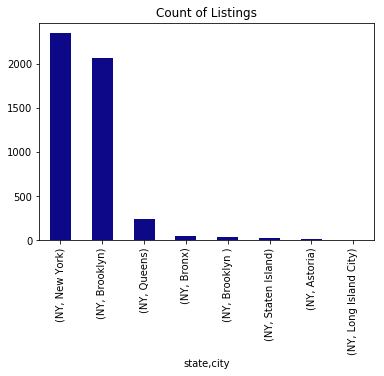

In [66]:
e=d.loc[(d['listings_count']>5)]
e['listings_count'].plot(kind = 'bar', cmap = 'plasma')
plt.title('Count of Listings')